## Gradient Descent Algorithm

<img src="https://media.licdn.com/dms/image/D4E22AQGNGF5TSty08A/feedshare-shrink_2048_1536/0/1692702375274?e=1707350400&v=beta&t=jTcb25ffEPCQzSff-wRZVoUZwElYh8KlP1g_yQ9TNtE" alt="GIF Example">


### Hemant Thapa

### 1. Importing Libraries

In [1]:
import math 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from typing import Callable, List

### 2. Introduction

Within the vast landscape of optimisation algorithms, Gradient Descent (GD) emerges as a stalwart, renowned for its adeptness in the iterative pursuit of local extrema within functions. It is a cornerstone, a linchpin within the fields of machine learning (ML) and deep learning (DL), where it reigns supreme in the art of minimizing cost or loss functions, a pivotal task in tasks like linear regression.
Yet, GD's influence transcends the confines of ML and DL, casting its far-reaching net across an eclectic array of domains:

1. Control Engineering:

- In robotics, Gradient Descent ensures precise, adaptive movements for tasks like surgery and complex manufacturing.
- Within chemical processes, it optimizes reaction kinetics and ingredient proportions for efficiency in pharmaceuticals and sustainable energy solutions.

2. Computer Games:

- For game developers, Gradient Descent optimizes gameplay dynamics, ensuring a challenging and engaging experience.
- It fine-tunes non-player character (NPC) behavior, creating realistic and dynamic game environments.
- Optimisation of graphics rendering ensures smooth gameplay across various hardware configurations.

3. Mechanical Engineering:

- In mechanical systems, GD fine-tunes components like gears, suspensions, and aerodynamics, enhancing efficiency and performance.
- It shapes turbine blades in jet engines for fuel efficiency and structural integrity.
- GD improves vehicle suspensions, enhancing ride quality and handling.
- In mechatronics, it enhances precision and adaptability in systems combining mechanical and electronic components.

3. Biomedical Engineering:

- Optimisation of medical imaging techniques for higher accuracy and reduced radiation exposure.
- Fine-tuning of control algorithms in medical devices, such as prosthetics and pacemakers.

4. Chemical Engineering:

- Optimisation of chemical reactions in the production of pharmaceuticals and specialty chemicals.
- Control of temperature and pressure in industrial processes to improve efficiency and safety.

5. Environmental Engineering:

- Optimisation of water treatment processes for pollutant removal and reduced energy consumption.

- Design of air quality monitoring systems for precise data collection.

5. Petroleum Engineering:

- Optimisation of drilling techniques and well placement for maximum oil and gas recovery.
- Control of reservoirs and production systems for efficient resource extraction.

6. Civil Engineering (Geotechnical):

- Soil stabilisation and foundation optimization for construction projects.
- Landslide prediction and control in hilly or mountainous areas.

Today, we embark on an intricate journey, delving into the mathematical intricacies, pragmatic implementations, and nuanced behavior that underpin the first-order Gradient Descent algorithm. Unlike conventional ML tutorials that hew to structured datasets, our path veers into the realm of bespoke cost functions, affording us the flexibility to tackle functions of diverse complexities.

Notably, the lineage of this venerable algorithm traces back to 1847, when Augustin-Louis Cauchy first breathed life into its foundations. This historical perspective precedes the advent of contemporary computing, encapsulating a rich heritage. While computer science and numerical methodologies have advanced, Gradient Descent has remained resilient, evolving into a plethora of refined iterations. In our discourse, we adhere to the algorithm's fundamental tenets, implementing it through a classical Python instantiation.

### 3. Function Requirements

The Gradient Descent algorithm is a powerful optimization tool, but it comes with specific prerequisites. 
To be eligible for Gradient Descent, a function must meet two critical criteria:

- Differentiable

- Convex

Differentiability is a fundamental mathematical property that signifies the existence of a derivative for each point within the function's domain. In simple terms, it means that you can calculate the rate at which the function changes at any given point. This property enables Gradient Descent to iteratively navigate the function landscape, adjusting its steps based on the slope or gradient of the function. Functions that are continuous and have well-defined derivatives, like polynomials, trigonometric functions, and most commonly encountered mathematical expressions, readily meet this criterion.

- Linear Function: A linear function, such as f(x) = 2x + 3, is differentiable everywhere. Its derivative is a constant, and you can calculate the slope at any point within its domain.

- Quadratic Function: Quadratic functions, like f(x) = x^2, are differentiable for all real numbers. The derivative is straightforward to calculate using the power rule: f'(x) = 2x.

- Trigonometric Function: Trigonometric functions, such as f(x) = sin(x), are differentiable for all real numbers. The derivatives of trigonometric functions can be derived using trigonometric identities.

- Exponential Function: Exponential functions like f(x) = e^x are differentiable everywhere. The derivative of an exponential function is the same as the original function.

In [2]:
#generate x values
x = np.linspace(-5, 5, 400)
print(x)

[-5.         -4.97493734 -4.94987469 -4.92481203 -4.89974937 -4.87468672
 -4.84962406 -4.8245614  -4.79949875 -4.77443609 -4.74937343 -4.72431078
 -4.69924812 -4.67418546 -4.64912281 -4.62406015 -4.59899749 -4.57393484
 -4.54887218 -4.52380952 -4.49874687 -4.47368421 -4.44862155 -4.4235589
 -4.39849624 -4.37343358 -4.34837093 -4.32330827 -4.29824561 -4.27318296
 -4.2481203  -4.22305764 -4.19799499 -4.17293233 -4.14786967 -4.12280702
 -4.09774436 -4.0726817  -4.04761905 -4.02255639 -3.99749373 -3.97243108
 -3.94736842 -3.92230576 -3.89724311 -3.87218045 -3.84711779 -3.82205514
 -3.79699248 -3.77192982 -3.74686717 -3.72180451 -3.69674185 -3.6716792
 -3.64661654 -3.62155388 -3.59649123 -3.57142857 -3.54636591 -3.52130326
 -3.4962406  -3.47117794 -3.44611529 -3.42105263 -3.39598997 -3.37092732
 -3.34586466 -3.32080201 -3.29573935 -3.27067669 -3.24561404 -3.22055138
 -3.19548872 -3.17042607 -3.14536341 -3.12030075 -3.0952381  -3.07017544
 -3.04511278 -3.02005013 -2.99498747 -2.96992481 -2.9

In [3]:
#functions 
#linear equation
def linear_function(x):
    return 2*x + 3

#quadratic equation
def quadratic_function(x):
    return x**2

#trigonometric equation 
def trigonometric_function(x):
    return np.sin(x)

#exponential equation
def exponential_function(x):
    return np.exp(x)

In [4]:
#function to plot functions
def multiple_functions_plot(x, functions, labels, colors, titles):

    #length of functions
    num_functions = len(functions)
    fig,axes = plt.subplots(1,num_functions,figsize=(4*num_functions, 4))

    #for loop to iterate through range of num_fuinctions
    for i in range(num_functions):
        ax = axes[i]

        #plotting line plot 
        ax.plot(x, functions[i](x), label=labels[i], color=colors[i])

        #title of graph
        ax.set_title(titles[i])

        #label x axis
        ax.set_xlabel('x')

        #label y axis
        ax.set_ylabel('f(x)')

        #grid line
        ax.grid(True, ls='--', alpha=0.5, color='grey')

        #label line plot
        ax.legend()

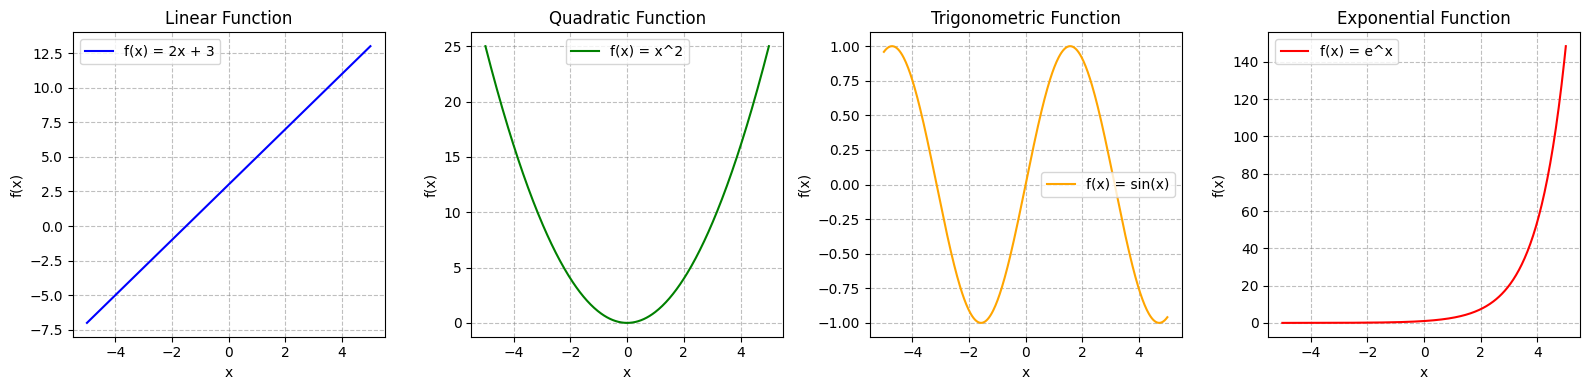

In [5]:
#list of functions 
functions = [linear_function, quadratic_function, trigonometric_function, exponential_function]

#equation of each function
labels = ['f(x) = 2x + 3', 'f(x) = x^2', 'f(x) = sin(x)', 'f(x) = e^x']

#color of each function
colors = ['blue', 'green', 'orange', 'red']

#title of each function
titles = ['Linear Function', 'Quadratic Function', 'Trigonometric Function', 'Exponential Function']

#calling function to plot, multiple function plot
multiple_functions_plot(x, functions, labels, colors, titles)
plt.tight_layout();

What is Non-differentiable functions?

Non-differentiable functions are mathematical functions for which a derivative does not exist at certain points or over certain intervals within their domains. In other words, at these specific points or intervals, the rate of change of the function cannot be precisely determined or calculated using traditional differentiation techniques.

- Lack of Derivative: At the points or intervals where a function is non-differentiable, there is no well-defined derivative. The derivative represents the rate at which a function changes at a given point, and it is typically calculated as the slope of the tangent line to the curve at that point. When a function is non-differentiable, this tangent line does not exist, and hence, the derivative is undefined.

- Discontinuities or Singularities: Non-differentiable functions often exhibit certain characteristics that lead to their lack of differentiability. Common causes include sharp corners, discontinuities, jump discontinuities, and vertical tangents in the graph of the function. These irregularities prevent the calculation of a smooth and continuous derivative.

- Special Cases: Some non-differentiable functions are intentionally defined for specific purposes. For example, the absolute value function (|x|) is non-differentiable at x = 0 due to its sharp corner, but it serves as a useful mathematical construct for various applications.

- Challenges in Calculus: Dealing with non-differentiable functions can pose challenges in calculus and mathematical analysis. While traditional differentiation rules may not apply, specialized techniques like the use of limits or distribution theory may be employed to handle these functions.

- Real-World Significance: Non-differentiable functions can represent real-world phenomena that involve abrupt changes, discontinuities, or singularities. They are encountered in various fields, including physics, engineering, optimization, and signal processing.

### Jump Discontinuity

A jump discontinuity, also known as a simple or finite discontinuity, occurs at a point where the function experiences an abrupt change in its value. Specifically, on one side of the point, the function has a different limit than on the other side. This results in a "jump" in the graph of the function when you transition from one side to the other.

Mathematically, for a function f(x), a jump discontinuity occurs at a point c if:

### $$lim(x→c-) f(x) ≠ lim(x→c+) f(x)$$

In simpler terms, as you approach c from the left (x→c-), the function approaches one value, and as you approach c from the right (x→c+), the function approaches a different value. This abrupt change results in a discontinuity in the graph of the function.

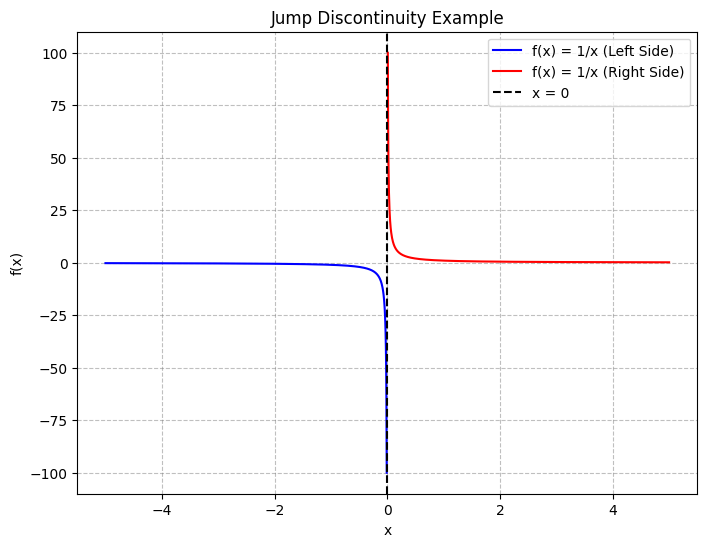

In [6]:
#x values excluding 0
x_left = np.linspace(-5, -0.01, 1000)
x_right = np.linspace(0.01, 5, 1000)

#function f(x) = 1/x
def jump_discontinuity_function(x):
    return 1 / x

#corresponding y values for the function on the left and right sides of 0
y_left = jump_discontinuity_function(x_left)
y_right = jump_discontinuity_function(x_right)

#plot for the jump discontinuity function
plt.figure(figsize=(8, 6))
plt.plot(x_left, y_left, label='f(x) = 1/x (Left Side)', color='blue')
plt.plot(x_right, y_right, label='f(x) = 1/x (Right Side)', color='red')
plt.title('Jump Discontinuity Example')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axvline(0, color='black', linestyle='--', label='x = 0')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend();

### Cusp (Infinite) Discontinuity

A cusp discontinuity, also referred to as an infinite discontinuity or a corner discontinuity, occurs at a point where the function's graph makes a sharp turn. Unlike a jump discontinuity, where there is an abrupt change in the function's value, a cusp discontinuity is characterized by the function's derivative becoming infinite at the point.

Mathematically, for a function f(x), a cusp discontinuity occurs at a point c if:

### $$ lim(x→c) |f'(x)| = ∞ $$

In other words, as you approach c, the derivative of the function |f'(x)| becomes infinite, indicating that the function's graph makes a sharp corner or turn at that point.

An example of a cusp discontinuity can be seen in the graph of the absolute value function f(x) = |x| at x = 0. The derivative of |x| is not defined at x = 0, and as you approach x = 0, the function's graph makes a sharp turn, forming a cusp.

Absolute Value Function (|x|)

The absolute value function, |x| or f(x)=∣x∣, is non-differentiable at x = 0. At x = 0, the function has a sharp corner, and its derivative is undefined.

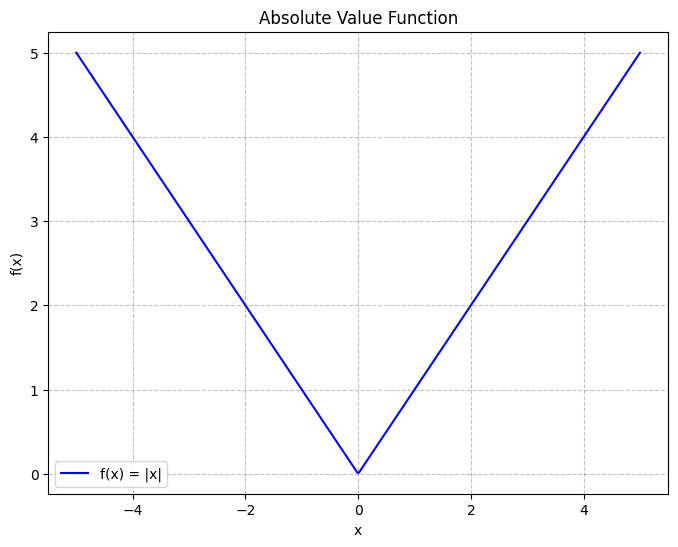

In [7]:
#generate x values
x = np.linspace(-5, 5, 400)

#absolute value function
def absolute_value_function(x):
    return np.abs(x)

#corresponding y values for the absolute value function
y_absolute = absolute_value_function(x)

#plot for the absolute value function
plt.figure(figsize=(8, 6))
plt.plot(x, y_absolute, label='f(x) = |x|', color='blue')
plt.title('Absolute Value Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend();

### Step Function (Heaviside Function):

The step function, often denoted as H(x) or u(x), is non-differentiable at x = 0. It abruptly changes from 0 to 1 at this point, leading to an undefined derivative.

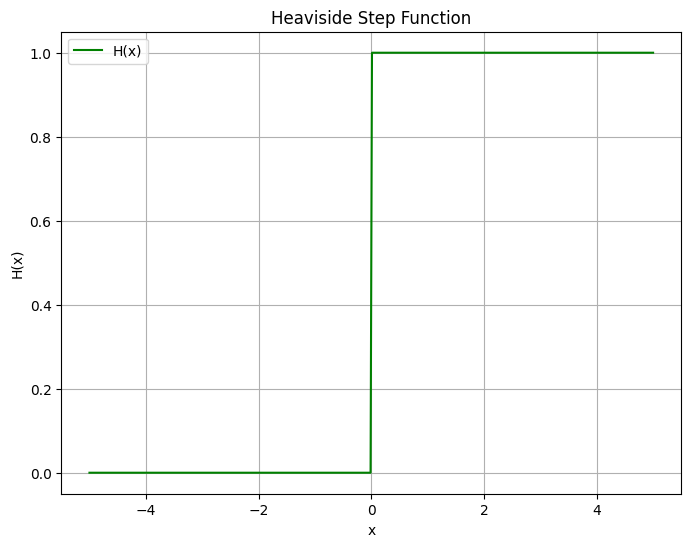

In [8]:
#generate x values
x = np.linspace(-5, 5, 400)

#heaviside step function
def heaviside_function(x):
    return np.heaviside(x, 1)

#corresponding y values for the Heaviside function
y_heaviside = heaviside_function(x)

#plot for the Heaviside step function
plt.figure(figsize=(8, 6))
plt.plot(x, y_heaviside, label='H(x)', color='green')
plt.title('Heaviside Step Function')
plt.xlabel('x')
plt.ylabel('H(x)')
plt.grid(True)
plt.legend();

### Sign Function (sgn(x)):



The sign function, sgn(x), returns -1 for x < 0, 1 for x > 0, and 0 for x = 0. It is non-differentiable at x = 0 because it lacks a well-defined derivative at this point.

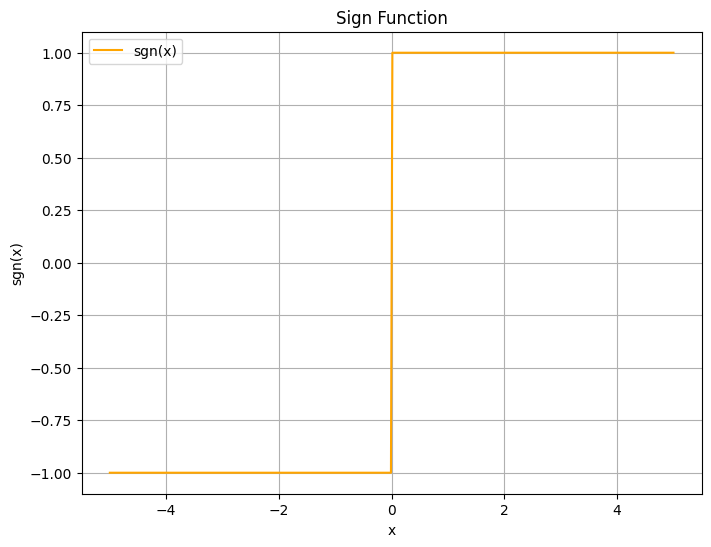

In [9]:
#generate x values
x = np.linspace(-5, 5, 400)

#sign function
def sign_function(x):
    return np.sign(x)

#corresponding y values for the sign function
y_sign = sign_function(x)

#plot for the sign function
plt.figure(figsize=(8, 6))
plt.plot(x, y_sign, label='sgn(x)', color='orange')
plt.title('Sign Function')
plt.xlabel('x')
plt.ylabel('sgn(x)')
plt.grid(True)
plt.legend();

### Dirac Delta Function (δ(x)):

The Dirac delta function is a mathematical construct used in distributions and signal processing. It is non-differentiable at all points and is defined through its integral properties rather than a traditional derivative.

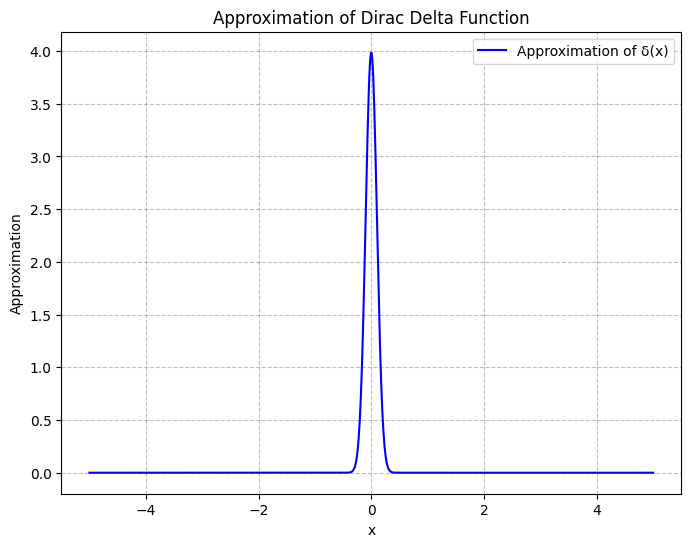

In [10]:
#generate x values
x = np.linspace(-5, 5, 1000)

#the approximation of the Dirac delta function using a narrow Gaussian
def dirac_delta_approximation(x, sigma=0.1):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / sigma)**2)

#corresponding y values for the approximation
y_dirac_approximation = dirac_delta_approximation(x)

#plot for the approximation of the Dirac delta function
plt.figure(figsize=(8, 6))
plt.plot(x, y_dirac_approximation, label='Approximation of δ(x)', color='blue')
plt.title('Approximation of Dirac Delta Function')
plt.xlabel('x')
plt.ylabel('Approximation')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

### Piecewise Functions:

Functions that are defined differently in different intervals can be non-differentiable at points where these intervals meet. For example, consider a piecewise function that is defined as f(x) = x^2 for x < 0 and f(x) = |x| for x ≥ 0. This function is non-differentiable at x = 0 where the two pieces meet.

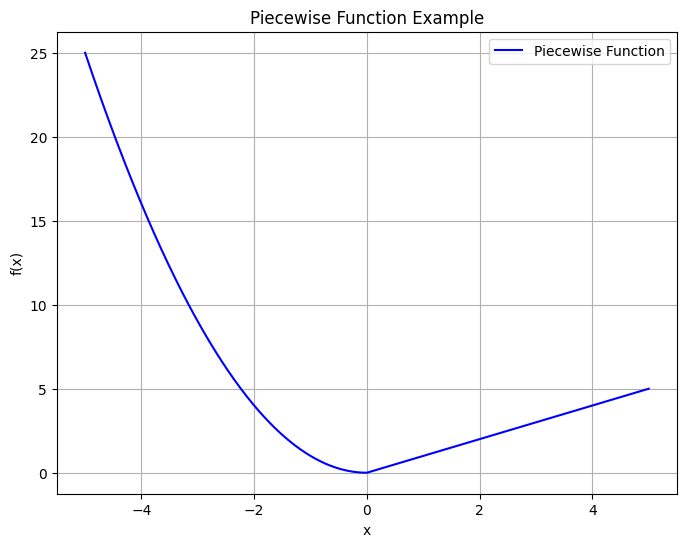

In [11]:
#generate x values
x = np.linspace(-5, 5, 1000)

#piecewise function
def piecewise_function(x):
    #an array to store the results
    result = np.zeros_like(x)
    
    #first segment: f(x) = x^2 for x < 0
    condition1 = x < 0
    result[condition1] = x[condition1]**2
    
    #second segment: f(x) = |x| for x >= 0
    condition2 = x >= 0
    result[condition2] = np.abs(x[condition2])
    
    return result

#corresponding y values for the piecewise function
y_piecewise = piecewise_function(x)

#plot for the piecewise function
plt.figure(figsize=(8, 6))
plt.plot(x, y_piecewise, label='Piecewise Function', color='blue')
plt.title('Piecewise Function Example')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

### Convexity

In the context of univariate functions, the concept of convexity simplifies to a fundamental rule: when you connect any two points on the function's curve with a straight line segment, that segment should either touch the curve or consistently stay above it. Put differently, it should never cut through the curve. This condition guarantees that any local minimum is also a global minimum.

### $$ f(λx₁ + (1 - λ)x₂) ≤ λf(x₁) + (1 - λ)f(x₂)$$

Here, λ represents a point's position along the line connecting the two points, ranging from 0 (at the left point) to 1 (at the right point). When λ equals 0.5, it signifies the midpoint.

This requirement ensures the smoothness of the function's graph, maintaining that it never dips below the line connecting any two points.

Convexity is a geometric property that characterizes the shape of the function's graph. A function is considered convex if, for any two points within its domain, the line segment connecting those two points lies entirely above the graph of the function. In other words, it's like a bowl-shaped or U-shaped curve where there's only one minimum (global minimum) that Gradient Descent can reach.

#### Convex Function:

A convex function is a type of mathematical function that exhibits a specific geometric property.

- Line Segment Property: For any two points within the function's domain, the line segment connecting those two points lies entirely above or on the graph of the function. In other words, if you select any two points on the curve of a convex function and draw a straight line between them, that line will always stay above or touch the curve.

- Single Global Minimum: Convex functions have only one minimum point, often referred to as the global minimum. This global minimum represents the lowest value that the function can attain within its domain.

- U-Shaped or Bowl-Shaped Curve: Visually, convex functions often resemble a "U" or a "bowl." The curve slopes upward on both sides of the global minimum, forming a shape that opens upward.

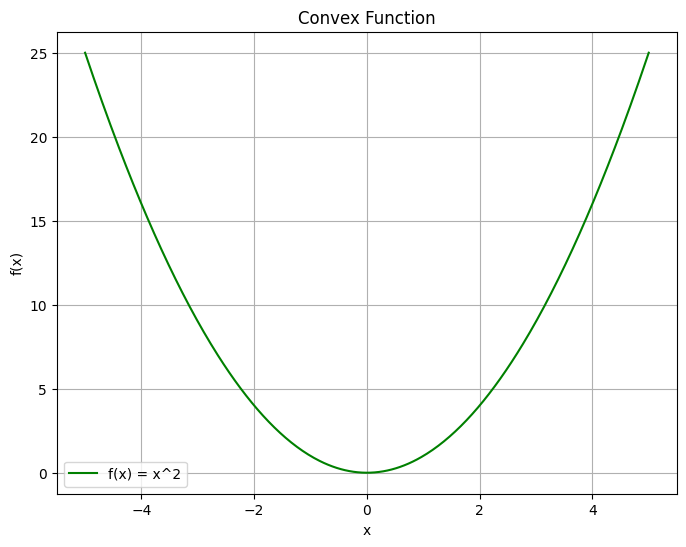

In [12]:
#generate x values
x = np.linspace(-5, 5, 400)

#define the convex function
def convex_function(x):
    return x**2

#corresponding y values for the convex function
y_convex = convex_function(x)

#plot convex function
plt.figure(figsize=(8, 6))
plt.plot(x, y_convex, label='f(x) = x^2', color='green')
plt.title('Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

### Non-Convex Function

A non-convex function is a function that lacks the convexity property. This means that for some pairs of points within its domain, the line segment connecting those points may cross below the graph of the function.

- Multiple Local Minima and Maxima: Non-convex functions can have multiple local minima (points where the function reaches a local low) and local maxima (points where the function reaches a local high) within their domains.

- Complex and Varied Shapes: The graph of a non-convex function can exhibit complex and varied shapes. It may include regions of increasing and decreasing values, as well as flat or plateau-like regions.

- Challenges in Optimization: Non-convex functions pose challenges for optimization algorithms because they do not guarantee convergence to the global minimum. Optimization algorithms may get stuck in local minima or experience convergence issues in the presence of non-convexity.

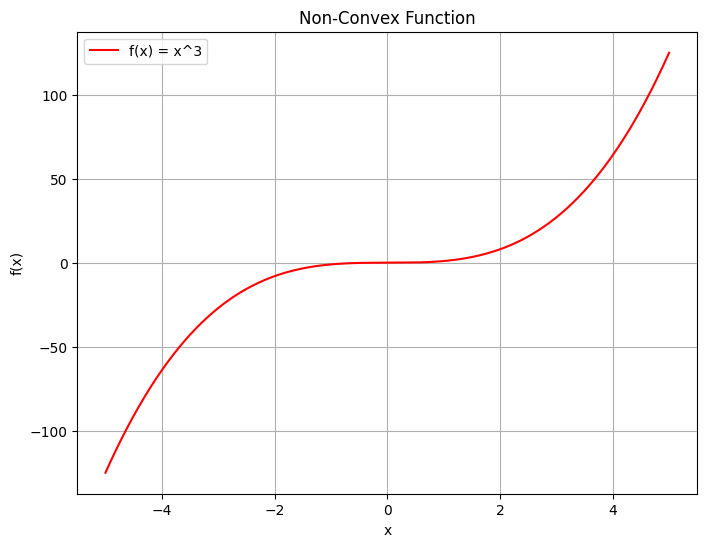

In [13]:
#generate x values
x = np.linspace(-5, 5, 400)

#non-convex function
def non_convex_function(x):
    return x**3

#corresponding y values for the non-convex function
y_non_convex = non_convex_function(x)

#plot for the non-convex function
plt.figure(figsize=(8, 6))
plt.plot(x, y_non_convex, label='f(x) = x^3', color='red')
plt.title('Non-Convex Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

When exploring the convexity of a univariate function, there's a mathematical test that simplifies the process: examining the second derivative. By calculating the second derivative of the function and ensuring that its value is consistently greater than 0 across the entire domain, we can confidently conclude that the function is convex.

### Mathematically, this test is expressed 

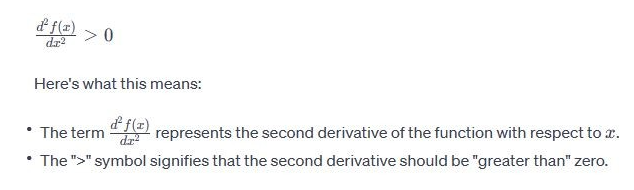

In simpler terms this test examines the curvature of the function. If the curvature is consistently positive throughout the entire range of x, it confirms that the function is indeed convex. This approach provides a straightforward way to assess convexity, allowing us to make informed decisions about optimiSation and analysis.

### Convexity and quasi-convex functions

A function f is convex if, for any two points x₁ and x₂, the line segment connecting (x₁, f(x₁)) and (x₂, f(x₂)) lies above the graph of f.

Mathematical Expression of Convexity:

The mathematical expression is given by:

$$ f(λx₁ + (1−λ)x₂) ≤ λf(x₁) + (1−λ)f(x₂)$$

Here, λ is a number between 0 and 1 and represents a point on the line segment connecting x₁ and x₂.

Second Derivative Test for Convexity:

If the second derivative d²f/dx² is greater than 0 for all x in the domain of f, then f is convex.

Convex Function - Quadratic Function:

Consider $f(x) = x² - x + 3.$

First and Second Derivatives

- First derivative: df/dx = 2x - 1

- Second derivative: d²f/dx² = 2

Convexity Conclusion

Since d²f/dx² = 2 > 0, the function f(x) = x² - x + 3 is strictly convex.

### Quasi-convex Function and Saddle Points

Consider $$ f(x) = x⁴ - 2x³ + 2.$$

First and Second Derivatives

- First derivative: df/dx = 4x³ - 6x²

- Second derivative: d²f/dx² = 12x² - 12x

Identifying Saddle Points

Saddle points are identified where the first derivative equals zero but the second derivative does not indicate a maximum or minimum.

Analysis of Convexity/Concavity

- For x < 0, the function is convex (`d²f/dx² > 0`).

- For 0 < x < 1, the function is concave (`d²f/dx² < 0`).

- For x > 1, the function is convex again.

Saddle Point Conclusion

- The point x = 0 is a saddle point.

- The point x = 1.5

### Multivariate Functions

Multivariate functions are mathematical constructs that depend on multiple variables. Unlike single-variable functions, which map a single input to a single output, multivariate functions take several inputs and produce an output. They find applications in various fields, including physics, engineering, economics, and machine learning, where systems are influenced by multiple factors.

When analysing multivariate functions, our primary goal is to identify critical points, which are points where the derivative(s) of the function are either zero or undefined. Critical points can be broadly categorised into three types: maxima, minima, and the intriguing saddle points.

### The Complex Nature of Saddle Points

Saddle points are a distinctive and complex phenomenon within multivariate functions. Unlike maxima and minima, saddle points exhibit unique behavior, making their identification a more intricate task. To detect saddle points, we often rely on the Hessian matrix—a square matrix containing second partial derivatives of the multivariate function.

$$ f(x, y) = x^2 - y^2$$ 

$$ f(0, 0) = 0^2 - 0^2 = 0$$ 

Examining Points along the X-axisIf we examine points along the x-axis (y = 0), we observe a distinct pattern. As we move away from the origin in either direction, the function values increase—positive on one side and negative on the other.

Investigating Points along the Y-axisConversely, when we shift our focus to points along the y-axis (x = 0), we notice a similar trend. As we move away from the origin in either direction along this axis, the function values also increase—positively in one direction and negatively in the other.



### The Saddle Point Phenomenon

This intriguing behavior exemplifies the saddle point characteristic. A saddle point is neither a maximum nor a minimum; instead, it's a point where the function exhibits a unique behavior. In some directions, the function curves upward, while in others, it curves downward.

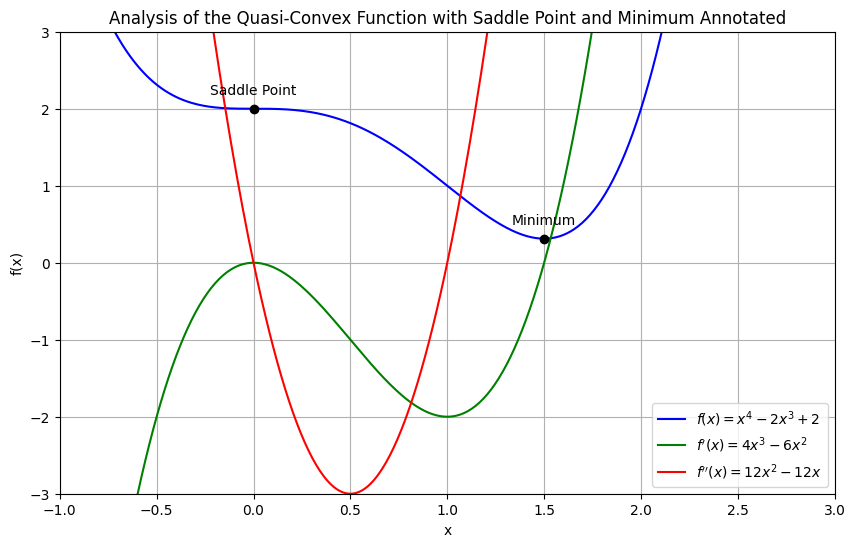

In [14]:
#quasi-convex function, its first and second derivatives
def f(x):
    return x**4 - 2*x**3 + 2

def f_prime(x):
    return 4*x**3 - 6*x**2

def f_double_prime(x):
    return 12*x**2 - 12*x

#range of x values 
x = np.linspace(-1, 3, 400)

#function values and its derivatives for the new range of x
y = f(x)
y_prime = f_prime(x)
y_double_prime = f_double_prime(x)

# function and its first and second derivatives 
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='$f(x) = x^4 - 2x^3 + 2$', color='blue')
plt.plot(x, y_prime, label="$f'(x) = 4x^3 - 6x^2$", color='green')
plt.plot(x, y_double_prime, label="$f''(x) = 12x^2 - 12x$", color='red')

#saddle point and minimum
#saddle point at x=0
plt.scatter(0, f(0), color='black', zorder=5)
plt.annotate('Saddle Point', (0, f(0)), textcoords="offset points", xytext=(0,10), ha='center')

#minimum at x=1.5 (We know this from the previous mathematical analysis)
plt.scatter(1.5, f(1.5), color='black', zorder=5)
plt.annotate('Minimum', (1.5, f(1.5)), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Analysis of the Quasi-Convex Function with Saddle Point and Minimum Annotated')

#adjusted the y-axis and x-axis
plt.ylim(-3, 3)
plt.xlim(-1, 3)
plt.show()

#### The plot above depicts the quasi-convex function:

$$ f(x) = x^4 - 2x^3 + 2$$

accompanied by its first derivative:

$$f'(x) = 4x^3 - 6x^2$$

and its second derivative:

$$f''(x) = 12x^2 - 12x.$$

We can spot the critical point on the graph, where the first derivative nearly touches zero. This particular point resides at approximately x = 0, and the second derivative's value here is almost zero but slightly negative. This tells us that we're dealing with a saddle point, not a minimum.

Upon scrutinizing the second derivative, we discern a compelling pattern:

When x < 0, the function displays convex behavior.

Between 0 < x < 1, it takes on a concave nature.

Beyond x > 1, it returns to being convex.

This analysis aligns seamlessly with the provided information.

The visual representation undeniably confirms the presence of a saddle point at x = 0, evident from the negative second derivative, which influences the function's concavity.

However, our exploration yielded only one critical point near zero, and due to the inherent characteristics of numerical methods, we can't definitively ascertain additional critical points, such as x = 1.5, without further investigation. Nonetheless, the plotted behavior strongly hints at the existence of a minimum beyond the range of x we've examined.

Understanding saddle points enriches our comprehension of function behavior.

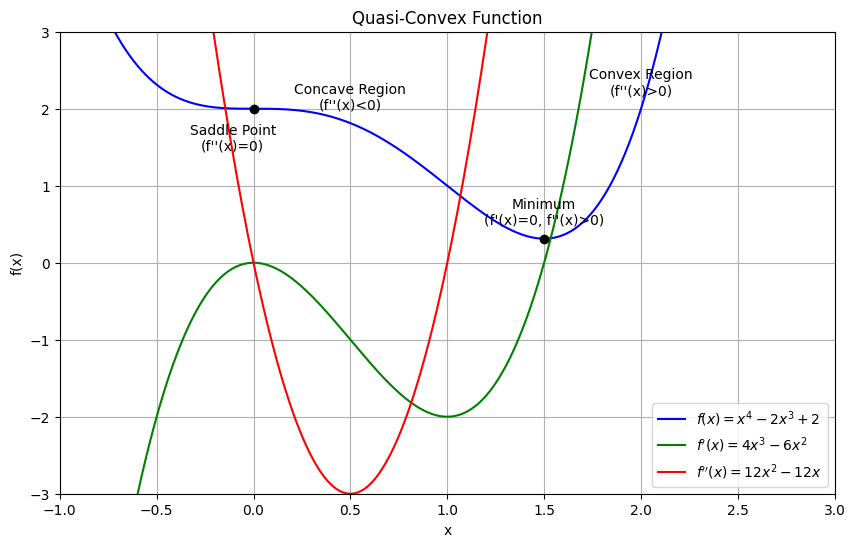

In [15]:
#function with the second derivative analysis 
plt.figure(figsize=(10, 6))
#function and its derivatives
plt.plot(x, y, label='$f(x) = x^4 - 2x^3 + 2$', color='blue')
plt.plot(x, y_prime, label="$f'(x) = 4x^3 - 6x^2$", color='green')
plt.plot(x, y_double_prime, label="$f''(x) = 12x^2 - 12x$", color='red')

#saddle point at x=0
plt.scatter(0, f(0), color='black', zorder=5)
plt.annotate('Saddle Point\n(f\'\'(x)=0)', (0, f(0)), textcoords="offset points", xytext=(-15,-30), ha='center')

#minimum at x=1.5
plt.scatter(1.5, f(1.5), color='black', zorder=5)
plt.annotate('Minimum\n(f\'(x)=0, f\'\'(x)>0)', (1.5, f(1.5)), textcoords="offset points", xytext=(0,10), ha='center')

#regions of concavity and convexity
plt.annotate('Convex Region\n(f\'\'(x)>0)', (2, f(2)), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('Concave Region\n(f\'\'(x)<0)', (0.5, f(0.5)), textcoords="offset points", xytext=(0,10), ha='center')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quasi-Convex Function')
plt.ylim(-3, 3)
plt.xlim(-1, 3)
plt.show()

The saddle point at x = 0 is unmistakably highlighted. At this point, the first derivative (f'(x)) is zero, and similarly, the second derivative (f''(x)) is also zero—typical characteristics of a saddle point.

We've also pinpointed the minimum point at x = 1.5. Here, the first derivative (f'(x)) equals zero, but crucially, the second derivative (f''(x)) is positive. This positivity of the second derivative signifies the presence of a local minimum.

The concave region is duly noted, existing where the second derivative (f''(x)) is less than zero—spanning from x = 0 to x = 1.

On the flip side, the convex regions are also distinctly marked. They manifest where the second derivative (f''(x)) takes on positive values, characterizing intervals where x is less than zero and greater than one.

### 4. Gradient Descent

- Understanding the Gradient: The gradient is a vector that combines the partial derivatives of a function with respect to each of its variables. For a function f(x,y), the gradient would be a two-dimensional vector consisting of the partial derivative with respect to x and the partial derivative with respect to y.

- Calculating Partial Derivatives: The partial derivative of a function with respect to one of its variables is calculated by differentiating the function with respect to that variable while treating all other variables as constants.

- Forming the Gradient Vector: Once the partial derivatives are found, they are arranged into a vector. This vector is the gradient.

- Interpreting the Gradient: At any given point, the gradient vector points in the direction of the steepest ascent. Its magnitude gives the rate of increase in that direction. 

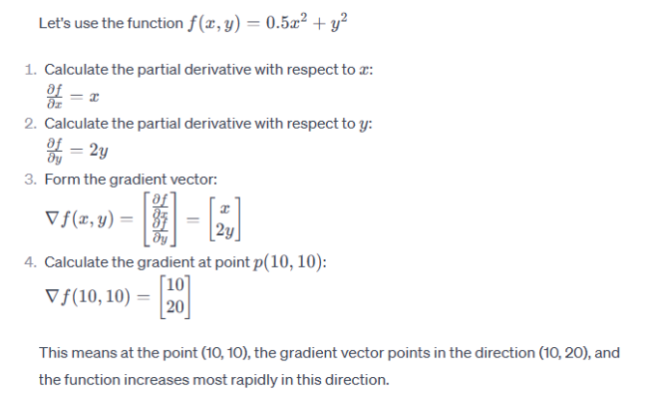

In [16]:
import sympy as sp

In [17]:
#symbols
x, y = sp.symbols('x y')

#function
f = 0.5 * x**2 + y**2

#gradient
gradient = sp.Matrix([sp.diff(f, var) for var in (x, y)])

#gradient at a specific point
gradient_at_point = gradient.subs({x: 10, y: 10})

#output
print(gradient_at_point)

Matrix([[10.0000000000000], [20]])


In [18]:
#function and its gradient
def f(x, y):
    return 0.5 * x**2 + y**2

def gradient(x, y):
    df_dx = x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

#gradient at a specific point
point_x = 10
point_y = 10

grad_at_point = gradient(point_x, point_y)
print(grad_at_point)

[10 20]


This result confirms our hand calculation, indicating that at the point (10, 10), the slope of the curve is steeper in the y-direction (with a value of 20) than in the x-direction (with a value of 10). This vector points in the direction of the steepest ascent from the point (10, 10) on the surface defined by the function.

### 5. Building Algorithm

The Gradient Descent Algorithm is a cornerstone of machine learning, providing a mechanism to find the minimum of a function efficiently.

#### The Essence of Gradient Descent

Imagine standing in a valley surrounded by mountains. Your goal is to find the lowest point. You can’t see the bottom directly, so you feel the ground to discern the slope and take steps downwards. This is akin to what Gradient Descent does in a multidimensional landscape of data.

#### How It Operates

Initialisation: The journey begins with a guess, known as the initialisation. Think of it as choosing a random spot to start our descent in the valley.

Direction of Descent: To find our way down, we calculate the gradient at our current location. The gradient is like the steepness of the slope under our feet, pointing uphill. Since we want to go down, we’ll move in the opposite direction.

The Learning Rate: We don't just rush downhill; we take measured steps, sized according to a parameter called the learning rate (denoted by η). This is crucial: too large a step (a high learning rate), and we might overshoot the valley's bottom; too small (a low learning rate), and our journey is tediously slow, risking getting stuck if the terrain flattens prematurely.

The Descent: Equipped with the direction and size of our step, we move. This step is the heart of the algorithm: a new point is calculated by subtracting the scaled gradient from our current position.

Convergence Criteria: We repeat this process, stepping down the slope iteratively. We stop when we’ve either taken a predetermined number of steps (iterations) or our steps become so small that we’re not moving significantly (determined by a threshold called tolerance).

#### Practical Application

In practical terms, Gradient Descent allows us to adjust the parameters of our model, be it linear regression or a neural network, to minimize the cost function—a measure of how wrong our model's predictions are. By iterating over the gradients, we tweak these parameters to steadily improve our model's accuracy.

#### The Mathematical Model

Mathematically, the update rule for the algorithm can be expressed as:

### $$pₙ₊₁ = pₙ - η∇F(pₙ)$$

Here, pₙ is the current position, ∇F(pₙ) is the gradient of the function at pₙ, and η is the learning rate. This equation is the iterative step that nudges our parameters in the direction that reduces the function’s value.

The choice of the learning rate is a delicate balance and often requires tuning. A rate that's too high may cause the algorithm to diverge, while one that's too low may result in a long convergence time or getting stuck in a local minimum. Therefore, it’s not just about going downhill; it’s about doing so efficiently and effectively, much like an experienced hiker finding the best path to the valley floor.

Final result: x = 0.04722366482869646


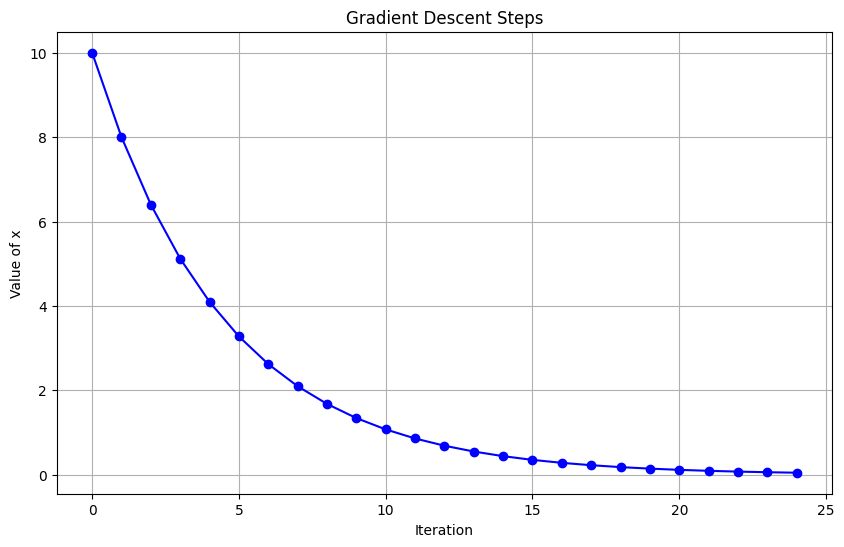

In [19]:
 #gradient_descent function parameters
# - start: The initial value of x for the optimization.
# - gradient: The gradient (derivative) function of the objective function.
# - learn_rate: The learning rate, controlling the step size in each iteration.
# - max_iter: The maximum number of iterations to prevent infinite loops.
# - tol: A tolerance value for stopping criteria (optional, defaults to 0.01).

def gradient_descent(start: float, gradient: Callable[[float], float],
                     learn_rate: float, max_iter: int, tol: float = 0.01) -> List[float]:
    #initialise x with the starting value
    x = start  
    #list to track the history of x values 
    steps = [start]  

    #iterate for a maximum of 'max_iter' times
    for _ in range(max_iter):

        #gradient adjusted by the learning rate
        diff = learn_rate * gradient(x)  

        #absolute change is smaller than the tolerance
        if np.abs(diff) < tol:  
            #if so, stop the iterations
            break  
        #update x with the new value
        x = x - diff  
        #append the new x value to the history list
        steps.append(x) 
 
    #return the list of x values during the optimisation
    return steps  


#gradient function 
def gradient(x):
    return 2 * x

#initial values and parameters for the optimisation
#starting value of x
start = 10.0  
#learning rate (controls step size)
learn_rate = 0.1  
#maximum number of iterations
max_iter = 50  
#tolerance for stopping criteria (optional)
tol = 0.01  

#gradient_descent 
steps = gradient_descent(start, gradient, learn_rate, max_iter, tol)

#final result
final_x = steps[-1]
print(f"Final result: x = {final_x}")

#plot gradient descent
plt.figure(figsize=(10, 6))
plt.plot(range(len(steps)), steps, marker='o', linestyle='-', color='b')
plt.title('Gradient Descent Steps')
plt.xlabel('Iteration')
plt.ylabel('Value of x')
plt.grid(True)
plt.show()

- Start with the initial value.

- Calculate the gradient of the objective function at the current value.

- Multiply the gradient by the learning rate to determine the step size.

- Update the current value by subtracting the step size.

- Repeat the above steps until one of the stopping criteria is met: the maximum number of iterations is reached, or the change in the variable is smaller than the specified tolerance.

1. Starting Point [float]:The process begins with selecting an initial value for the variable you want to optimize. This starting point serves as the initial guess for the optimal value.

2. Gradient Function [object]:Before applying gradient descent, you must define a gradient function. This function calculates the gradient (derivative) of the objective function with respect to the variable you're optimizing. The gradient points in the direction of the steepest increase in the objective function.

3. Learning Rate [float]:The learning rate is a hyperparameter that determines the step size in each iteration of gradient descent. It scales the gradient, influencing how far you move in the direction of the gradient.

4. Maximum Number of Iterations [int]:To prevent infinite loops, you set a maximum number of iterations. Gradient descent will repeatedly update the variable until it converges or until the maximum number of iterations is reached.

5. Tolerance [float] (Optional):You can specify a tolerance level, which determines when the optimization should stop. If the absolute change in the variable between two consecutive iterations is smaller than the tolerance, the algorithm is considered to have converged, and it stops. The default tolerance is often set to a small value like 0.01.

### 6.  Gradient Descent for Quadratic Function

Consider the quadratic function f(x) = x^2 - 4x + 1. Our objective is to find the value of x that minimizes this function. To achieve this, we employ the Gradient Descent algorithm. This iterative method updates the value of x by moving in the direction opposite to the gradient (the derivative) of the function at the current x.

Gradient Calculation: The initial step involves computing the gradient of f(x). The gradient here is the derivative of f(x) with respect to x, which, for our function, is f'(x) = 2x - 4.

Update Rule: The update rule in Gradient Descent is defined as x_new = x_old - η * f'(x_old), where η represents the learning rate.

Learning Rate: The learning rate η is a crucial parameter that influences the step size towards the minimum. If η is small, the algorithm converges slowly, whereas a large η might lead to overshooting or even divergence from the minimum.

Iteration: The process starts from an initial guess of x and applies the update rule repeatedly. This iteration continues until the algorithm meets the convergence criteria, which could be a sufficiently small change between iterations or reaching a predetermined number of iterations.

A smaller learning rate (e.g., 0.1) takes more cautious steps towards the minimum, which is good for precision but may require more iterations. A larger learning rate (e.g., 0.8) takes larger steps, which might oscillate around the minimum before converging, or potentially even diverge if the learning rate is too large.

In [20]:
from typing import Callable, List

In [21]:
#function and its gradient
def func(x):
    return x**2 - 4*x + 1

In [22]:
def gradient(x):
    return 2 * x - 4

In [23]:
#gradient_descent
def gradient_descent(gradient, start, learn_rate, max_iter, tol):
    x = start
    steps = [start]
    
    for _ in range(max_iter):
        diff = learn_rate * gradient(x)
        if np.abs(diff) < tol:
            break
        x = x - diff
        steps.append(x)
    
    return x, steps

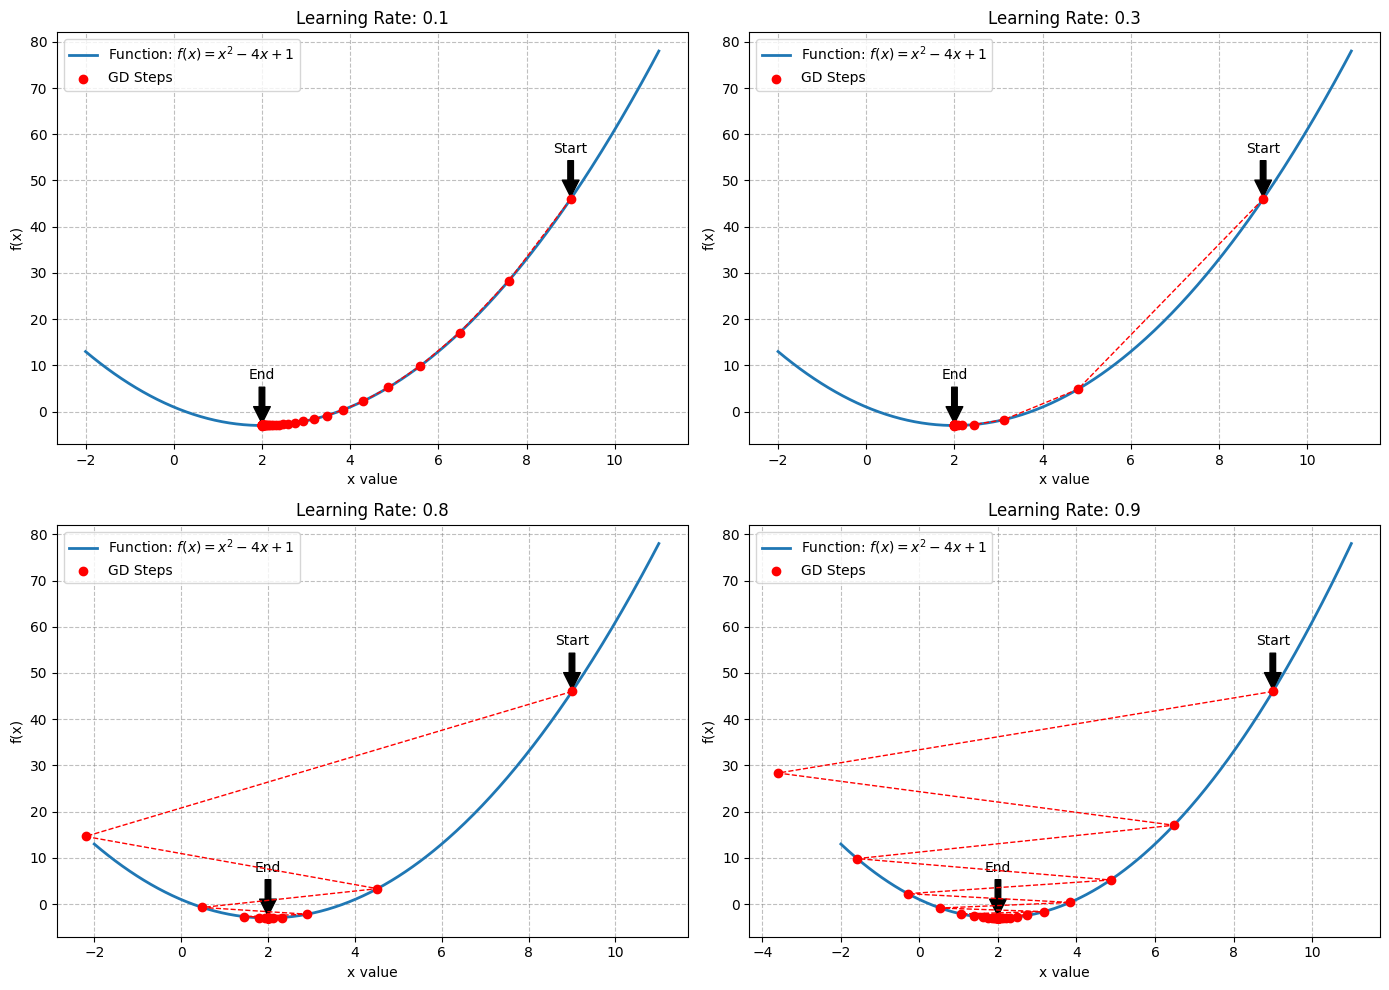

In [24]:
#gradient_descent curve plot
def gradient_descent_curve(ax, learning_rate):
    #gradient descent history
    final_x, history = gradient_descent(gradient, initial_x, learning_rate, iterations, tolerance)

    #plot the function
    ax.plot(x_values, y_values, label=f'Function: $f(x) = x^2 - 4x + 1$', lw=2)
    
    #plot the gradient descent steps
    ax.scatter(history, [func(x) for x in history], color='red', zorder=5, label='GD Steps')
    ax.plot(history, [func(x) for x in history], 'r--', lw=1, zorder=5)
    
    ax.annotate('Start', xy=(history[0], func(history[0])), xytext=(history[0], func(history[0]) + 10),
                arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
    ax.annotate('End', xy=(final_x, func(final_x)), xytext=(final_x, func(final_x) + 10),
                arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
    
    ax.set_title(f'Learning Rate: {learning_rate}')
    ax.set_xlabel('x value')
    ax.set_ylabel('f(x)')
    ax.grid(True, alpha=0.5, ls='--', color='grey')
    ax.legend()

    
    
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
#x values for the function and their corresponding y values
x_values = np.linspace(-2, 11, 400)
y_values = func(x_values)
#parameters
initial_x = 9
iterations = 100
tolerance = 1e-6
learning_rates = [0.1, 0.3, 0.8, 0.9]
#plot learning rates
for ax, lr in zip(axs.flatten(), learning_rates):
    gradient_descent_curve(ax, lr)
plt.tight_layout()
plt.show()

### 7. Summary 

In this exploration, we seen the world of Gradient Descent (GD), an optimisation algorithm that stands at the heart of many machine learning and engineering applications. We traced its origins back to the 19th century and appreciated its enduring relevance in today's computational landscape.

We established the critical role of differentiability in GD, defining it as the algorithm's compass, guiding the iterative journey towards local extrema. The nuances of convexity were examined, elucidating how this property guarantees the finding of global minima, a feature that GD capitalises on in its quest for optimisation.

Our journey through the algorithm's mechanics revealed the significance of the learning rate, a pivotal parameter that dictates the convergence efficacy. We articulated how the gradient serves as the stepping stone for GD, with each iteration a calculated move informed by the slope of the cost function.

In practice, we saw GD in action through a Python-coded excursion, applying it to a quadratic function. This practical demonstration not only grounded our theoretical insights but also highlighted the algorithm's adaptability to different functions and its sensitivity to various learning rates.

<img src="https://media.licdn.com/dms/image/D4E12AQHyuXLKfWGqhw/article-inline_image-shrink_1000_1488/0/1703477682137?e=1709769600&v=beta&t=-AaaTMrTES2wTNYUpJ0YVpFIEe4osQ4rLv6QFrONUAo" alt="GIF Example">

As we concluded, we reflected on the challenges posed by non-convex functions, such as the presence of saddle points, and acknowledged the ongoing research and advancements in optimisation algorithms that aim to tackle these hurdles